In [ ]:
import kagglehub
path = kagglehub.dataset_download("ahmedxc4/skin-ds")
print("Path to dataset files:", path)

100%|██████████| 9.25G/9.25G [04:04<00:00, 40.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2


In [ ]:
import os
DATASET_PATH = "/root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2"
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))
print("Path exists:", os.path.exists(DATASET_PATH))
print(os.listdir(DATASET_PATH))


/root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2
['README.md', 'val', 'test', 'train']
Path exists: True
['README.md', 'val', 'test', 'train']


In [ ]:
BASE_PATH = "/root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2"

TRAIN_PATH = os.path.join(BASE_PATH, "train")
VAL_PATH   = os.path.join(BASE_PATH, "val")
TEST_PATH  = os.path.join(BASE_PATH, "test")
print(os.listdir(TRAIN_PATH))

['HFMD', 'Measles', 'Benign keratosis-like lesions', 'Vascular lesions', 'Healthy', 'Cowpox', 'Monkeypox', 'Basal cell carcinoma', 'Chickenpox', 'Melanocytic nevi', 'Squamous cell carcinoma', 'Dermatofibroma', 'Actinic keratoses', 'Melanoma']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, TimeDistributed, LSTM
)
from tensorflow.keras.optimizers import Adam


In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 16
EPOCHS = 20
NUM_CLASSES = 15

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 128
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_gen = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 29322 images belonging to 14 classes.
Found 3660 images belonging to 14 classes.


In [ ]:
def add_time_dimension(generator):
    for x, y in generator:
        x = np.expand_dims(x, axis=1)  # (batch, 1, H, W, C)
        yield x, y

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = train_gen.num_classes

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,519,630 (24.87 MB)

 Trainable params: 6,519,630 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("Number of classes:", train_gen.num_classes)
print("Class indices:", train_gen.class_indices)

Number of classes: 14
Class indices: {'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions': 2, 'Chickenpox': 3, 'Cowpox': 4, 'Dermatofibroma': 5, 'HFMD': 6, 'Healthy': 7, 'Measles': 8, 'Melanocytic nevi': 9, 'Melanoma': 10, 'Monkeypox': 11, 'Squamous cell carcinoma': 12, 'Vascular lesions': 13}


In [ ]:
print("TRAIN_PATH =", TRAIN_PATH)
print(os.listdir(TRAIN_PATH))

TRAIN_PATH = /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/train
['HFMD', 'Measles', 'Benign keratosis-like lesions', 'Vascular lesions', 'Healthy', 'Cowpox', 'Monkeypox', 'Basal cell carcinoma', 'Chickenpox', 'Melanocytic nevi', 'Squamous cell carcinoma', 'Dermatofibroma', 'Actinic keratoses', 'Melanoma']


In [ ]:
EPOCHS = 10   # start small, we can increase later

history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=EPOCHS
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 438s 236ms/step - accuracy: 0.3990 - loss: 1.9080 - val_accuracy: 0.5090 - val_loss: 1.5157
Epoch 2/10
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 417s 224ms/step - accuracy: 0.4840 - loss: 1.5318 - val_accuracy: 0.5536 - val_loss: 1.3084
Epoch 3/10
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 400s 218ms/step - accuracy: 0.5290 - loss: 1.3994 - val_accuracy: 0.5787 - val_loss: 1.2354
Epoch 4/10
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 404s 220ms/step - accuracy: 0.5535 - loss: 1.3182 - val_accuracy: 0.5863 - val_loss: 1.1950
Epoch 5/10
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 401s 219ms/step - accuracy: 0.5663 - loss: 1.2547 - val_accuracy: 0.6107 - val_loss: 1.1161
Epoch 6/10
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 401s 219ms/step - accuracy: 0.5771 - loss: 1.2149 - val_accuracy: 0.6202 - val_loss: 1.0740
Epoch 7/10
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 404s 220ms/step - accuracy: 0.5958 - loss: 1.1584 - val_accuracy: 0.6303 - val_loss: 1.0644
Epoch 8/10
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 392s 214ms/step - ac

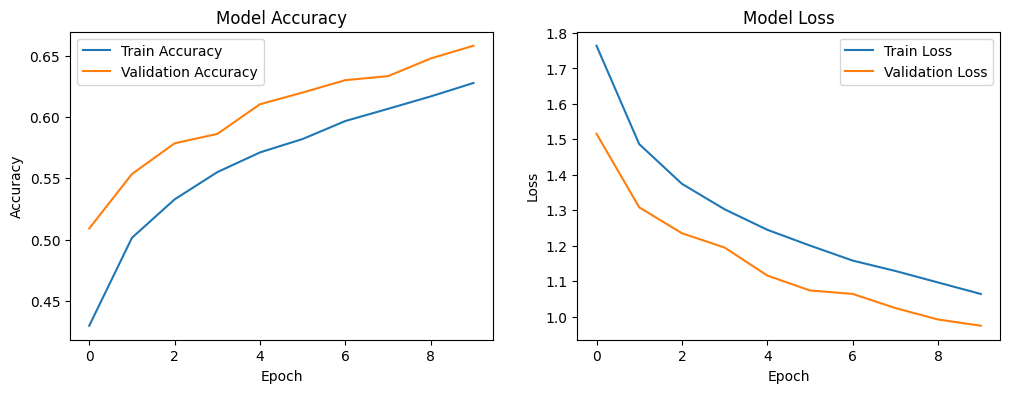

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3674 images belonging to 14 classes.


In [ ]:
test_loss, test_acc = model.evaluate(
    test_gen,
    steps=len(test_gen)
)

print("Test Accuracy:", test_acc)


230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 142ms/step - accuracy: 0.5619 - loss: 1.2237
Test Accuracy: 0.6518780589103699


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, TimeDistributed, LSTM
)
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = train_gen.num_classes

model_lstm = Sequential()

# CNN feature extractor (wrapped in TimeDistributed)
model_lstm.add(TimeDistributed(
    Conv2D(32, (3,3), activation='relu'),
    input_shape=(1, IMG_SIZE, IMG_SIZE, 3)
))
model_lstm.add(TimeDistributed(MaxPooling2D(2,2)))

model_lstm.add(TimeDistributed(
    Conv2D(64, (3,3), activation='relu')
))
model_lstm.add(TimeDistributed(MaxPooling2D(2,2)))

model_lstm.add(TimeDistributed(
    Conv2D(128, (3,3), activation='relu')
))
model_lstm.add(TimeDistributed(MaxPooling2D(2,2)))

model_lstm.add(TimeDistributed(Flatten()))

# LSTM layer
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))

# Output
model_lstm.add(Dense(NUM_CLASSES, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_lstm.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 1, 126, 126,    │           896 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1, 63, 63, 32)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 1, 61, 61, 64)  │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 1, 30, 30, 64)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 1, 28, 28, 128) │        73,856 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 1, 14, 14, 128) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 1, 25088)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    12,911,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,006,158 (49.61 MB)

 Trainable params: 13,006,158 (49.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

def add_time_dim(generator):
    for x, y in generator:
        x = np.expand_dims(x, axis=1)  # time = 1
        yield x, y


In [ ]:
EPOCHS = 5

history_lstm = model_lstm.fit(
    add_time_dim(train_gen),
    steps_per_epoch=len(train_gen),
    validation_data=add_time_dim(val_gen),
    validation_steps=len(val_gen),
    epochs=EPOCHS
)


Epoch 1/5
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 413s 225ms/step - accuracy: 0.4239 - loss: 1.8027 - val_accuracy: 0.5202 - val_loss: 1.4364
Epoch 2/5
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 416s 227ms/step - accuracy: 0.5066 - loss: 1.4797 - val_accuracy: 0.5749 - val_loss: 1.2660
Epoch 3/5
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 417s 228ms/step - accuracy: 0.5437 - loss: 1.3486 - val_accuracy: 0.5872 - val_loss: 1.2015
Epoch 4/5
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 417s 227ms/step - accuracy: 0.5629 - loss: 1.2743 - val_accuracy: 0.6016 - val_loss: 1.1575
Epoch 5/5
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 419s 229ms/step - accuracy: 0.5885 - loss: 1.1976 - val_accuracy: 0.6120 - val_loss: 1.1253


In [ ]:
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(
    add_time_dim(test_gen),
    steps=len(test_gen)
)

print("CNN + LSTM Test Accuracy:", test_acc_lstm)


230/230 ━━━━━━━━━━━━━━━━━━━━ 31s 136ms/step - accuracy: 0.5072 - loss: 1.3703
CNN + LSTM Test Accuracy: 0.6091453433036804


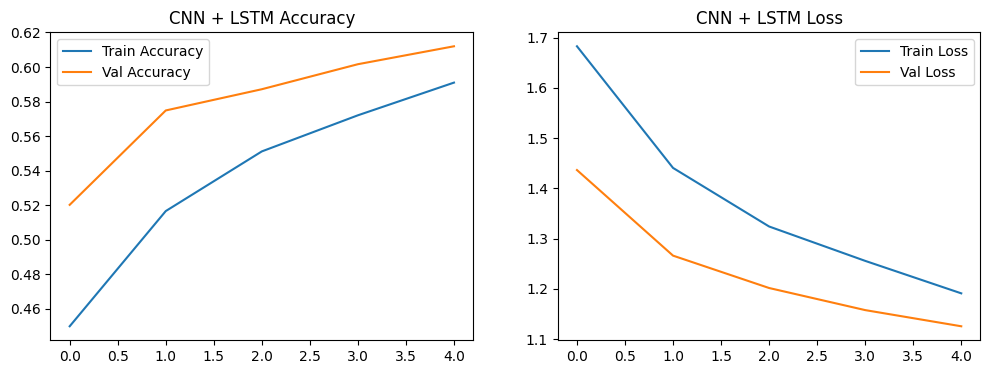

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN + LSTM Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('CNN + LSTM Loss')
plt.legend()

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_path = "/content/drive/MyDrive/models/skin_lesion_model.h5"

In [ ]:
model_lstm.save(model_path)

In [ ]:
model.save(model_path)